In [1]:
# only for cuda enabled laptop and desktop
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)
if physical_devices:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)

[]


In [2]:
from keras.layers import Input,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img,img_to_array,array_to_img
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [3]:
import os

In [4]:
os.listdir('flower_photos/')

['daisy', 'dandelion', 'LICENSE.txt', 'roses', 'sunflowers', 'tulips']

In [5]:
inception = InceptionV3(input_shape=(224,224,3),weights='imagenet',include_top=False)

In [6]:
inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [7]:
for layer in inception.layers:
    layer.trainable = False

In [19]:
x = Flatten()(inception.output)
prediction = Dense(5,activation='softmax')(x)

In [20]:
model = Model(inputs=inception.input,outputs=prediction)

In [21]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [22]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

In [24]:
test_datagen = ImageDataGenerator(rescale=1./255,
                                 validation_split=0.2)

In [25]:
training_set = train_datagen.flow_from_directory('flower_photos/',
                                                target_size=(224,224),
                                                batch_size=2, 
                                                subset='training',
                                                class_mode='categorical')

Found 3670 images belonging to 5 classes.


In [26]:
training_set.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [27]:
test_set = test_datagen.flow_from_directory('flower_photos/',
                                           target_size=(224,224),
                                           batch_size=2,
                                           subset='validation', 
                                           class_mode='categorical')

Found 731 images belonging to 5 classes.


In [28]:
test_set.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [29]:
history = model.fit(training_set,
                             validation_data=test_set,epochs=5)

Epoch 1/5
1835/1835 [==============================] - 122s 66ms/step - loss: 8.6389 - accuracy: 0.7346 - val_loss: 10.8295 - val_accuracy: 0.7442
Epoch 2/5
1835/1835 [==============================] - 121s 66ms/step - loss: 6.4574 - accuracy: 0.8253 - val_loss: 3.4462 - val_accuracy: 0.8741
Epoch 3/5
1835/1835 [==============================] - 120s 66ms/step - loss: 5.9535 - accuracy: 0.8668 - val_loss: 4.6340 - val_accuracy: 0.8824
Epoch 4/5
1835/1835 [==============================] - 121s 66ms/step - loss: 5.6662 - accuracy: 0.8809 - val_loss: 1.9973 - val_accuracy: 0.9466
Epoch 5/5
1835/1835 [==============================] - 120s 65ms/step - loss: 5.7888 - accuracy: 0.8850 - val_loss: 5.9581 - val_accuracy: 0.8824


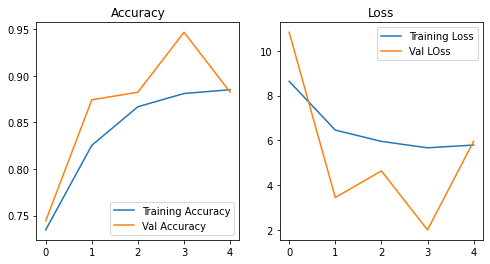

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(5)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()


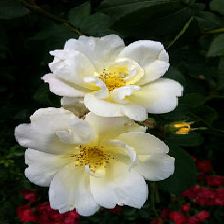

In [31]:
data_1 = load_img('flower_photos/roses/10090824183_d02c613f10_m.jpg',target_size=(224,224))

data_1

In [32]:
test_array = img_to_array(data_1)

In [33]:
test_array.shape

(224, 224, 3)

In [34]:
test_array = test_array.reshape(1,224,224,3)

In [35]:
model.predict(test_array)

array([[0.00000e+00, 0.00000e+00, 4.03839e-10, 0.00000e+00, 1.00000e+00]],
      dtype=float32)

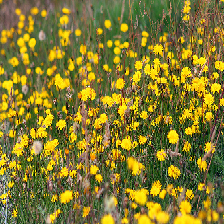

In [36]:
data_2 = load_img('flower_photos/dandelion/1080179756_5f05350a59.jpg',target_size=(224,224))

data_2

In [37]:
test_array = img_to_array(data_2)

In [38]:
test_array.shape

(224, 224, 3)

In [39]:
test_array = test_array.reshape(1,224,224,3)

In [40]:
model.predict(test_array)

array([[0., 0., 0., 0., 1.]], dtype=float32)